                                                    # CENSUS INCOME PROJECT

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
#from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.naive_bayes import GaussianNB as NB
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [2]:
# to import dataset
df = pd.read_csv('https://raw.githubusercontent.com/VIJAY/census_income.csv')
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
#to check column names
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [4]:
#info about the data shape of data,type of individual columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
# to check for categorical columns
obj_columns = []

for i in df.dtypes.index:
    if df.dtypes[i] == "O":
        obj_columns.append(i)
obj_columns   

['Workclass',
 'Education',
 'Marital_status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Native_country',
 'Income']

In [6]:
# # to check for numerical columns
num_columns = [] 

for i in df.dtypes.index:
    if df.dtypes[i] != "O":
        num_columns.append(i)
num_columns  

['Age',
 'Fnlwgt',
 'Education_num',
 'Capital_gain',
 'Capital_loss',
 'Hours_per_week']

In [7]:
# listing all Categorical data using for_loop method
for x in obj_columns:
    print(x)
    print(df[x].value_counts())
    print("-"*70)

Workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
----------------------------------------------------------------------
Education
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64
----------------------------------------------------------------------
Marital_status
 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                

In [8]:
# to check the mode of Workclass column 
df["Workclass"].mode()  # we will fill the '?' values with this mode value

0     Private
dtype: object

In [9]:
# Replacing '?' with mode value
df['Workclass'] = df.Workclass.str.replace('?', 'Private')

In [10]:
# to check the mode of Native_country column 
df["Native_country"].mode()  # we will fill the '?' values with this 

0     United-States
dtype: object

In [11]:
# Replacing '?' with mode value
df['Native_country'] = df.Native_country.str.replace('?', 'United-States')

In [12]:
# to Check the value count of Capital_gain column
df["Capital_gain"].value_counts()

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
1111         1
2538         1
22040        1
4931         1
5060         1
Name: Capital_gain, Length: 119, dtype: int64

In [13]:
#Droping Capital_gain column
df = df.drop(["Capital_gain"],axis=1)

In [14]:
#Checking the value count of Capital_loss column
df["Capital_loss"].value_counts()

0       31041
1902      202
1977      168
1887      159
1848       51
        ...  
2080        1
1539        1
1844        1
2489        1
1411        1
Name: Capital_loss, Length: 92, dtype: int64

In [15]:
#Droping Capital_loss column
df = df.drop(["Capital_loss"],axis=1)

In [16]:
df.head(5)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,<=50K


In [17]:
df.shape

(32560, 13)

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,32560.0,38.581634,13.640642,17.0,28.0,37.0,48.0,90.0
Fnlwgt,32560.0,189781.814373,105549.764924,12285.0,117831.5,178363.0,237054.5,1484705.0
Education_num,32560.0,10.080590,2.572709,1.0,9.0,10.0,12.0,16.0
Hours_per_week,32560.0,40.437469,12.347618,1.0,40.0,40.0,45.0,99.0


# Visualization:

In [19]:
# Separating numerical columns after dropping 2 columns
numerical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_columns.append(i)
print(numerical_columns)

['Age', 'Fnlwgt', 'Education_num', 'Hours_per_week']


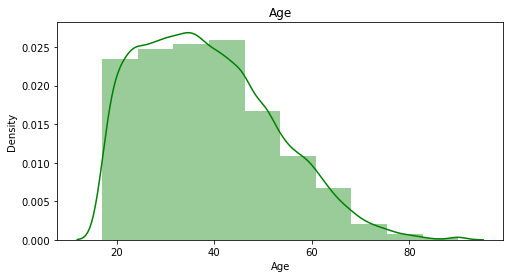

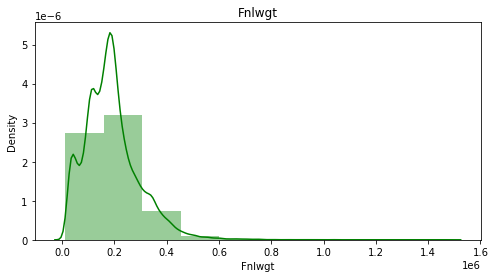

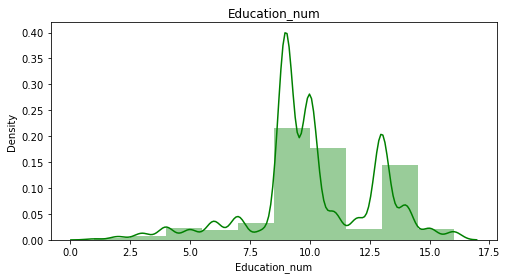

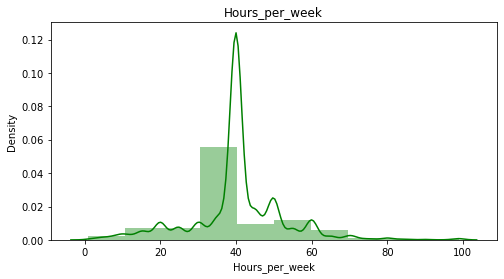

In [20]:
#Distribution plot for all numerical columns
for i in df[numerical_columns]:              
    plt.figure(figsize = (8, 4))
    sns.distplot(df[i], bins = 10, color="g")
    plt.title(i)
    plt.show()

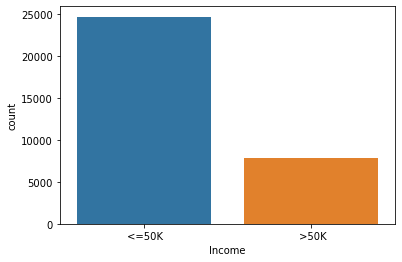

In [21]:
#Count plot for Income
sns.countplot(df['Income']);


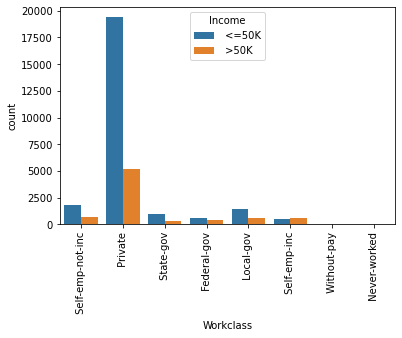

In [22]:
sns.countplot(x='Workclass',hue ='Income',data = df)
plt.xticks(rotation =90)
plt.show()

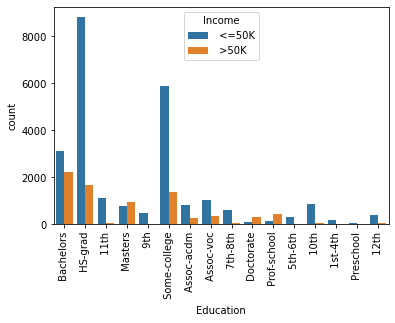

In [23]:
sns.countplot(x='Education',hue ='Income',data = df)
plt.xticks(rotation =90)
plt.show()

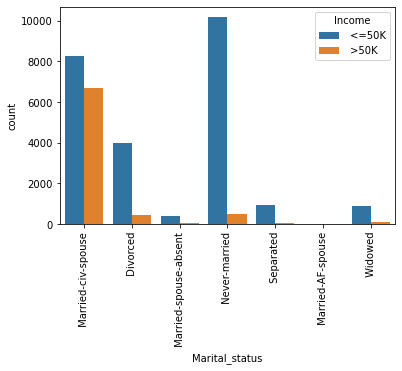

In [24]:
sns.countplot(x='Marital_status',hue ='Income',data = df)
plt.xticks(rotation =90)
plt.show()


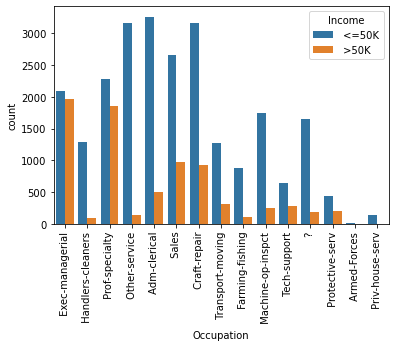

In [25]:
sns.countplot(x='Occupation',hue ='Income',data = df)
plt.xticks(rotation =90)
plt.show()

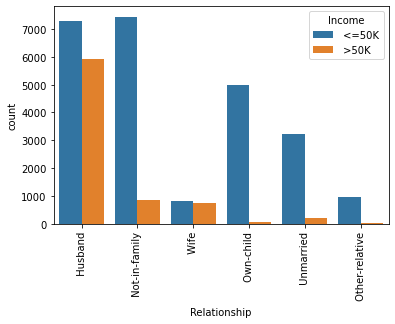

In [26]:
sns.countplot(x='Relationship',hue ='Income',data = df)
plt.xticks(rotation =90)
plt.show()

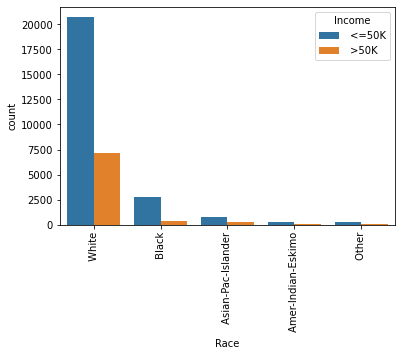

In [27]:
sns.countplot(x='Race',hue ='Income',data = df)
plt.xticks(rotation =90)
plt.show()

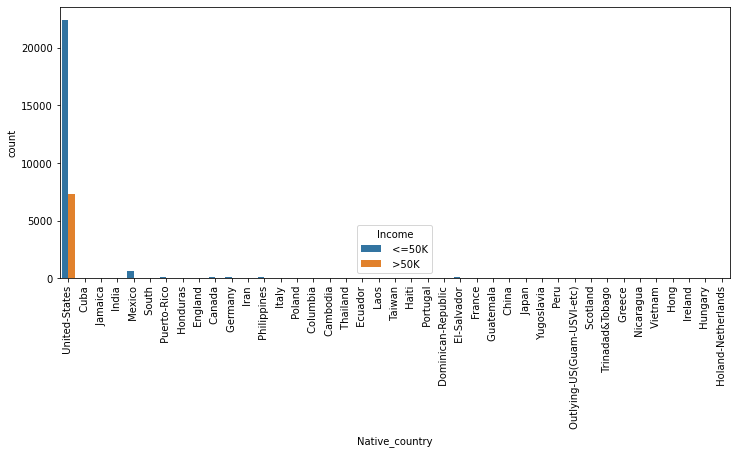

In [28]:
fig = plt.figure(figsize=(12,5))
sns.countplot(x='Native_country',hue ='Income',data = df)
plt.xticks(rotation =90)
plt.show()

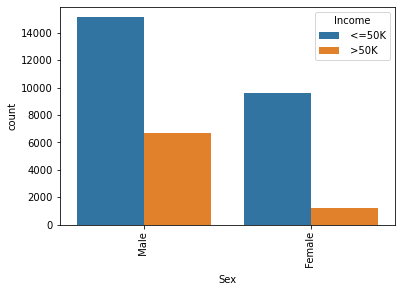

In [29]:
sns.countplot(x='Sex',hue ='Income',data = df)
plt.xticks(rotation =90)
plt.show()

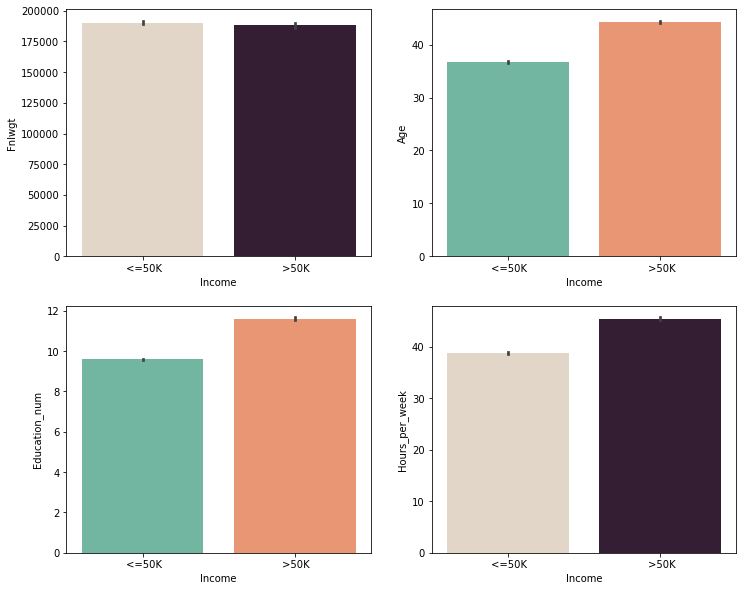

In [30]:
fig,axes=plt.subplots(2,2,figsize=(12,10))

# Checking income with Fnlwgt
sns.barplot(x='Income',y='Fnlwgt',ax=axes[0,0],data=df,palette='ch:.25')

# Checking income with Capital_gain
sns.barplot(x='Income',y='Age',ax=axes[0,1],data=df,palette='Set2')

# Checking income with Capital_loss
sns.barplot(x='Income',y='Education_num',ax=axes[1,0],data=df,palette='Set2')

# Checking income with Hours_per_week
sns.barplot(x='Income',y='Hours_per_week',ax=axes[1,1],data=df,palette='ch:.25')
plt.show()

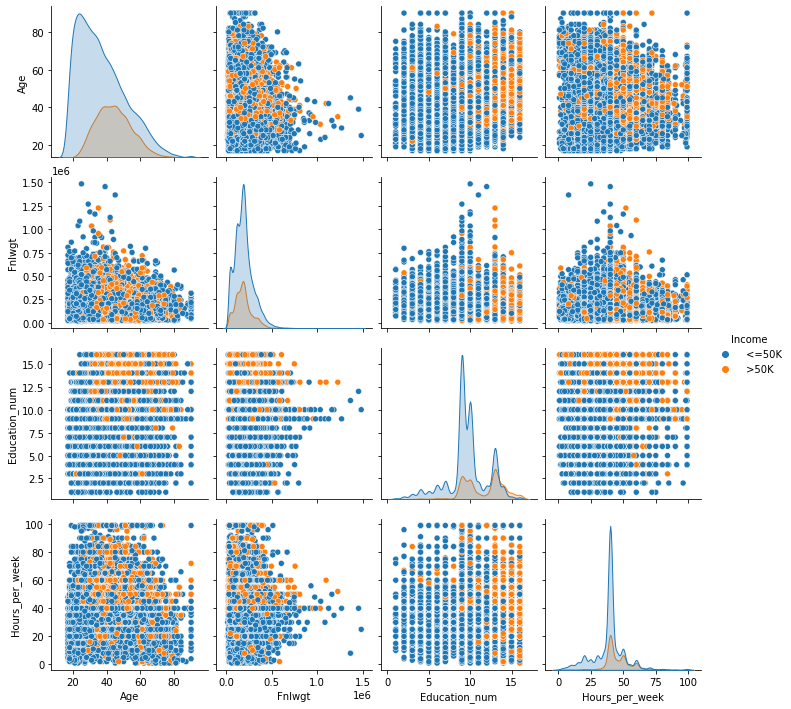

In [31]:
#pair ploting for df
sns.pairplot(df,hue="Income")

<AxesSubplot:>

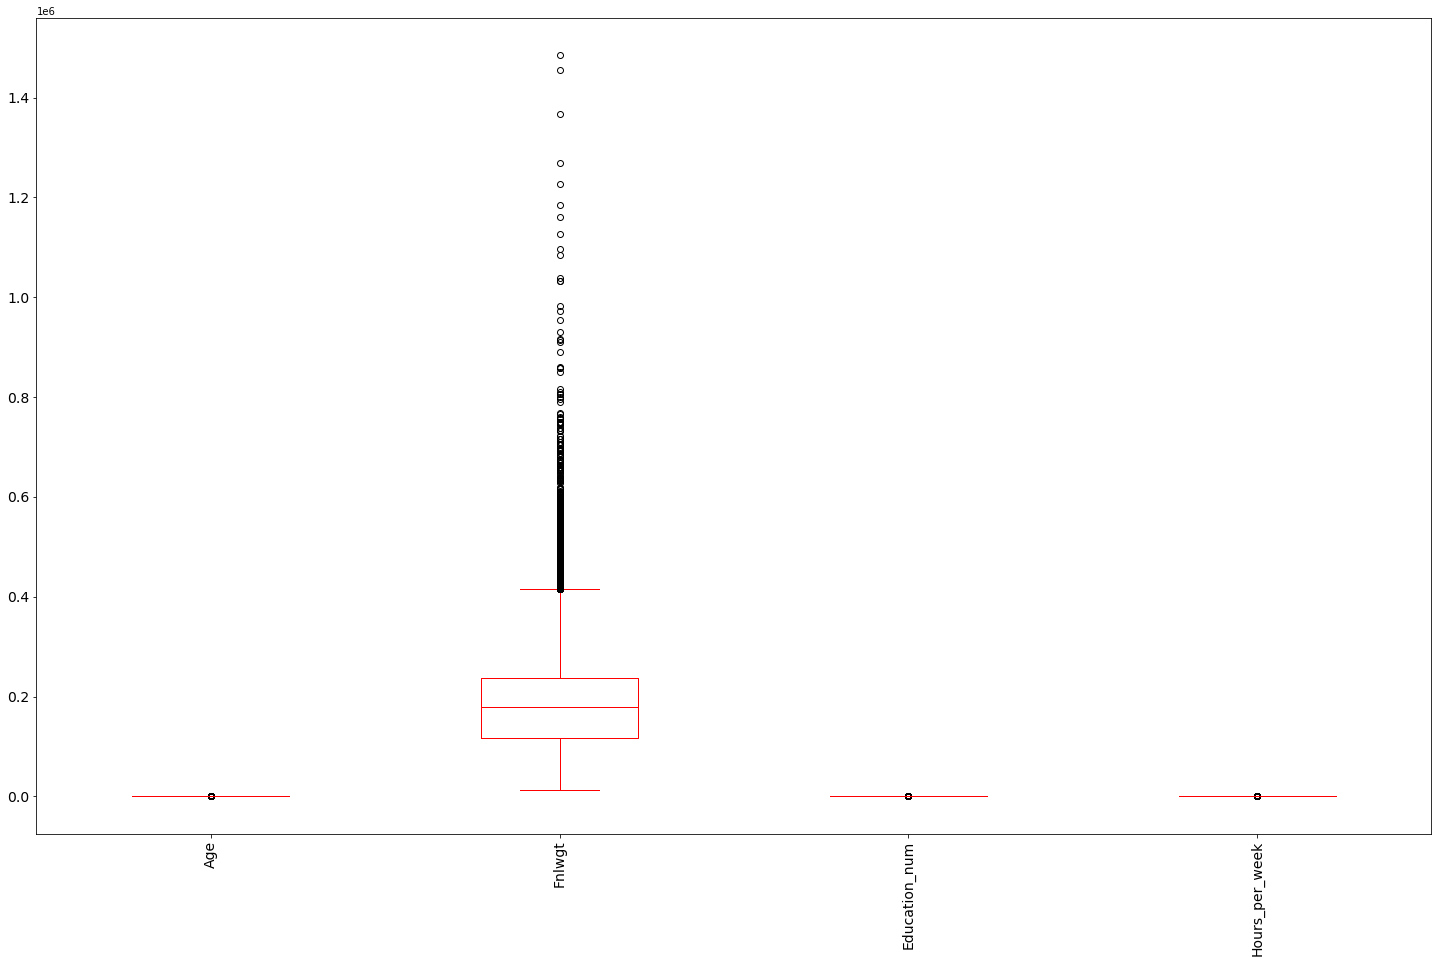

In [32]:
#Checking for outliers using boxplot
df.plot(rot = 90,kind='box',fontsize=14,figsize=(25,15),color='r')

# Removing outliers:

In [33]:
#creating column names with outliers as a list
dfoutliers=df[['Age','Fnlwgt','Education_num','Hours_per_week']]

# i) Zscore method:

In [34]:
# removing outliers with zscore
z=np.abs(zscore(dfoutliers))
df_new=df[(z<3).all(axis=1)]
df_new.head(5)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,<=50K


In [35]:
#Checking shape of new dataset
df_new.shape

(31461, 13)

In [36]:
#Checking dataloss in zscore method
Dataloss=(((32560-31461)/32560)*100)
Dataloss

3.3753071253071254

# Checking for skewness:

In [37]:
#Checking for skewness
df_new.skew()

Age               0.472279
Fnlwgt            0.634828
Education_num    -0.159752
Hours_per_week   -0.341724
dtype: float64

# Removing skewness using yeo-johnson method:

In [38]:
# creating list as attributes with skewness.
fea=["Fnlwgt"]

In [39]:
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box_cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box_cox' or 'yeo-johnson'\n"

In [40]:
df_new[fea] = scaler.fit_transform(df_new[fea].values)

In [41]:
# to check skewness again
df_new[fea].skew()

Fnlwgt   -0.034507
dtype: float64

<AxesSubplot:ylabel='Density'>

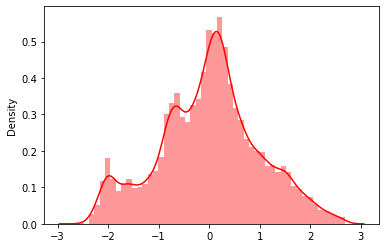

In [42]:
# to Check distplot for skewed columns after removing skewness
sns.distplot(df_new[fea],color='r')

# Label Encoding:

In [43]:
# Separating categorical columns in df_new
cat_col=[]
for i in df_new.dtypes.index:
    if df_new.dtypes[i]=='object':
        cat_col.append(i)
print(cat_col)

['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']


In [44]:
LE=LabelEncoder()
df_new[cat_col]= df_new[cat_col].apply(LE.fit_transform)

In [45]:
df_new[cat_col].head()

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income
0,5,8,2,4,0,4,1,38,0
1,3,10,0,6,1,4,1,38,0
2,3,1,2,6,0,2,1,38,0
3,3,8,2,10,5,2,0,4,0
4,3,11,2,4,5,4,0,38,0


In [46]:
df_new.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,5,-1.114171,8,13,2,4,0,4,1,13,38,0
1,38,3,0.427192,10,9,0,6,1,4,1,40,38,0
2,53,3,0.607320,1,7,2,6,0,2,1,40,38,0
3,28,3,1.487719,8,13,2,10,5,2,0,40,4,0
4,37,3,1.048962,11,14,2,4,5,4,0,40,38,0


# Checking correlation using heat map:

In [47]:
df_new.corr()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
Age,1.000000,0.038024,-0.066519,-0.000447,0.053361,-0.286424,-0.013628,-0.268028,0.030679,0.091664,0.097510,-0.001039,0.248351
Workclass,0.038024,1.000000,-0.021654,0.004652,0.003831,-0.020597,0.017997,-0.056825,0.046295,0.070095,0.030311,-0.001602,0.003494
Fnlwgt,-0.066519,-0.021654,1.000000,-0.024191,-0.033150,0.027732,0.003595,0.008287,-0.008299,0.025290,-0.015566,-0.061214,-0.004586
Education,-0.000447,0.004652,-0.024191,1.000000,0.356040,-0.039094,-0.021625,-0.015121,0.015552,-0.024911,0.061325,0.068374,0.077526
Education_num,0.053361,0.003831,-0.033150,0.356040,1.000000,-0.065568,0.112686,-0.102497,0.030849,0.016662,0.160483,0.054510,0.337595
Marital_status,-0.286424,-0.020597,0.027732,-0.039094,-0.065568,1.000000,-0.009028,0.185772,-0.067546,-0.127375,-0.197532,-0.017606,-0.198475
Occupation,-0.013628,0.017997,0.003595,-0.021625,0.112686,-0.009028,1.000000,-0.076199,0.007311,0.080495,0.071974,-0.004207,0.074643
Relationship,-0.268028,-0.056825,0.008287,-0.015121,-0.102497,0.185772,-0.076199,1.000000,-0.115216,-0.582940,-0.263412,-0.010871,-0.251506
Race,0.030679,0.046295,-0.008299,0.015552,0.030849,-0.067546,0.007311,-0.115216,1.000000,0.088642,0.045331,0.122051,0.072451
Sex,0.091664,0.070095,0.025290,-0.024911,0.016662,-0.127375,0.080495,-0.582940,0.088642,1.000000,0.239039,0.002060,0.216665


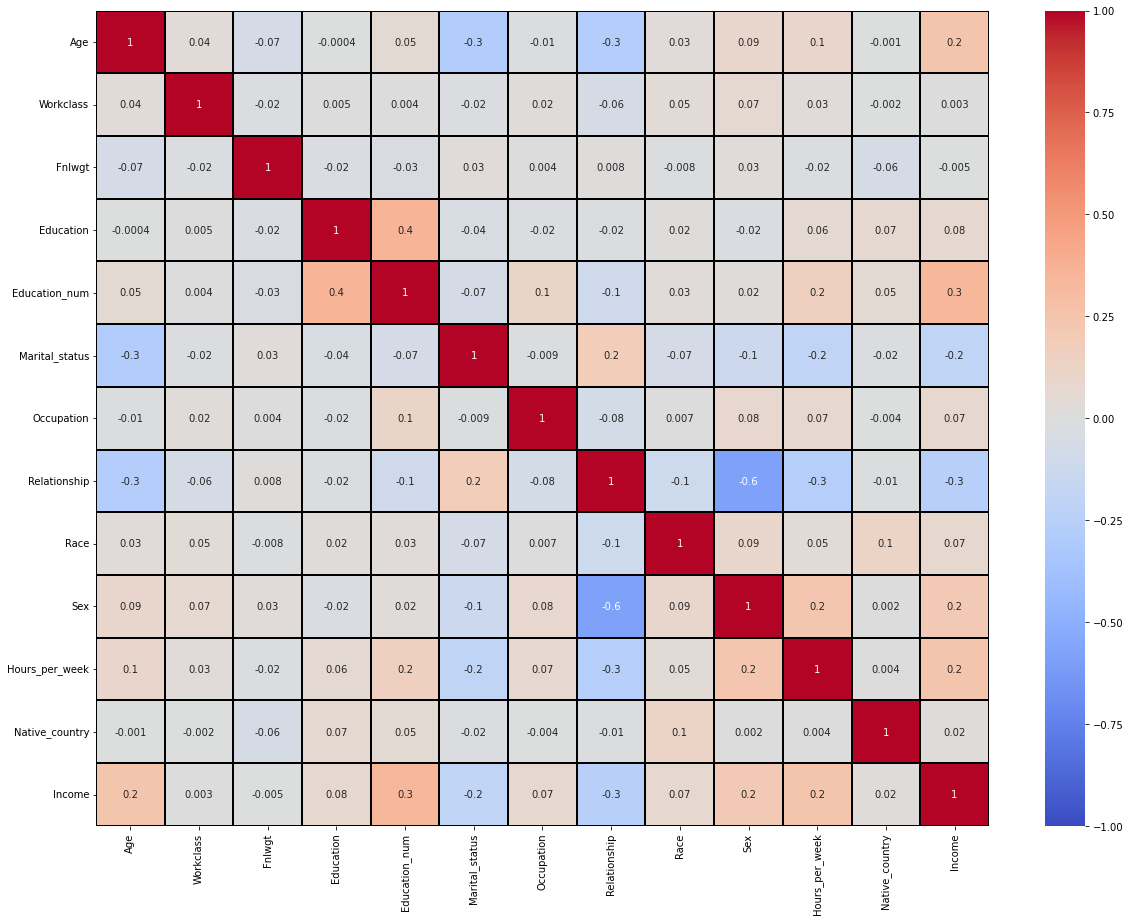

In [48]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(20,15))
sns.heatmap(df_new.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.1g', annot = True, linecolor="black",annot_kws={'size':10},cmap="coolwarm")
plt.yticks(rotation=0);

In [49]:
#Droping less correlated column
df_new = df_new.drop(["Workclass"],axis=1)

# Separating features and label:

In [50]:
x = df_new.drop("Income",axis=1)
y = df_new["Income"]

# Scaling the data using standard scaler:

In [51]:
# Data is scaled my data using standard scaler.
scaler=StandardScaler()
X = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [52]:
X.head()

,Age,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country
0,0.875057,-1.114171,-0.348344,1.154324,-0.403597,-0.609135,-0.903178,0.391304,0.706601,-2.424121,0.254062
1,-0.025350,0.427192,0.245782,-0.459657,-1.733114,-0.136411,-0.281938,0.391304,0.706601,-0.008364,0.254062
2,1.100158,0.607320,-2.427783,-1.266647,-0.403597,-0.136411,-0.903178,-1.969806,0.706601,-0.008364,0.254062
3,-0.775689,1.487719,-0.348344,1.154324,-0.403597,0.809038,2.203019,-1.969806,-1.415226,-0.008364,-5.457546
4,-0.100384,1.048962,0.542845,1.557819,-0.403597,-0.609135,2.203019,0.391304,-1.415226,-0.008364,0.254062


# Balancing the target variable using oversampling:

In [53]:
#Checking the value count of target column
y.value_counts()

0    23853
1     7608
Name: Income, dtype: int64

In [54]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
X, y = SM.fit_resample(X,y)

In [55]:
# Checking the value counts again
y.value_counts()

0    23853
1    23853
Name: Income, dtype: int64

<AxesSubplot:xlabel='Income', ylabel='count'>

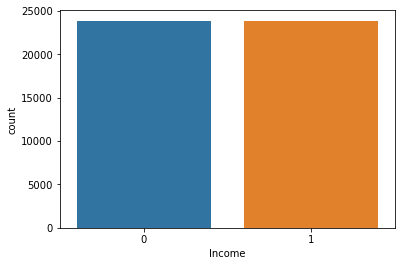

In [56]:
# Visualizing the data after oversampling
sns.countplot(y)

# Finding Best Random State and Accuracy:

In [57]:
maxAccu=0
maxRS=0
for i in range(1,200):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.30, random_state =i)
    mod = RandomForestClassifier()
    mod.fit(X_train, y_train)
    pred = mod.predict(X_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8827557294577977  on Random_state  69


In [58]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=maxRS)

# i) DecisionTreeClassifier:

In [59]:
DTC=DecisionTreeClassifier()
DTC.fit(X_train,y_train)
preddt=DTC.predict(X_test)
print('Accuracy Score:',accuracy_score(y_test, preddt))
print('Confusion Matrix:',confusion_matrix(y_test, preddt))
print(classification_report(y_test,preddt))

Accuracy Score: 0.8294438233650084
Confusion Matrix: [[5838 1290]
 [1151 6033]]
              precision    recall  f1-score   support

           0       0.84      0.82      0.83      7128
           1       0.82      0.84      0.83      7184

    accuracy                           0.83     14312
   macro avg       0.83      0.83      0.83     14312
weighted avg       0.83      0.83      0.83     14312



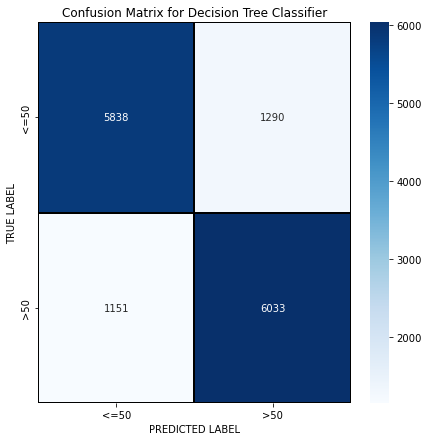

In [62]:
cm = confusion_matrix(y_test, preddt)

x_axis_labels = ["<=50",">50"]
y_axis_labels = ["<=50",">50"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Blues", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

# ii) RandomForestClassifier:

In [63]:
RFC=RandomForestClassifier()
RFC.fit(X_train,y_train)
predrf=RFC.predict(X_test)
print('Accuracy Score:',accuracy_score(y_test, predrf))
print('Confusion Matrix:',confusion_matrix(y_test, predrf))
print(classification_report(y_test,predrf))

Accuracy Score: 0.8821967579653438
Confusion Matrix: [[6144  984]
 [ 702 6482]]
              precision    recall  f1-score   support

           0       0.90      0.86      0.88      7128
           1       0.87      0.90      0.88      7184

    accuracy                           0.88     14312
   macro avg       0.88      0.88      0.88     14312
weighted avg       0.88      0.88      0.88     14312



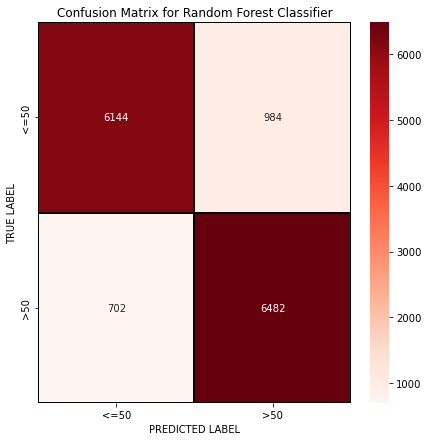

In [64]:
cm = confusion_matrix(y_test, predrf)

x_axis_labels = ["<=50",">50"]
y_axis_labels = ["<=50",">50"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Reds", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

# iii) SupportVectorClassifier:

In [65]:
SV=SVC()
SV.fit(X_train,y_train)
predsv=SV.predict(X_test)
print('Accuracy Score:',accuracy_score(y_test, predsv))
print('Confusion Matrix:',confusion_matrix(y_test, predsv))
print(classification_report(y_test,predsv))

Accuracy Score: 0.8130939072107323
Confusion Matrix: [[5305 1823]
 [ 852 6332]]
              precision    recall  f1-score   support

           0       0.86      0.74      0.80      7128
           1       0.78      0.88      0.83      7184

    accuracy                           0.81     14312
   macro avg       0.82      0.81      0.81     14312
weighted avg       0.82      0.81      0.81     14312



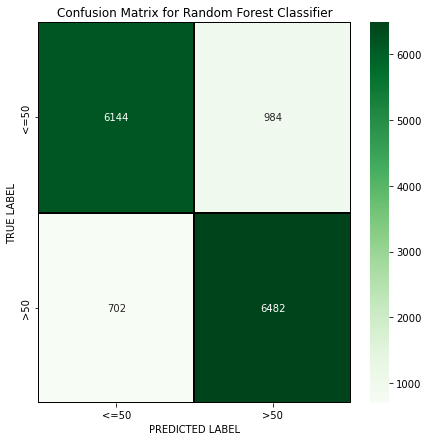

In [66]:
cm = confusion_matrix(y_test, predrf)

x_axis_labels = ["<=50",">50"]
y_axis_labels = ["<=50",">50"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Greens", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

# iv) K-Neighbor Classifier:

In [67]:
knn=KNN()
knn.fit(X_train,y_train)
predkn=knn.predict(X_test)
print('Accuracy Score:',accuracy_score(y_test, predkn))
print('Confusion Matrix:',confusion_matrix(y_test, predkn))
print(classification_report(y_test,predkn))

Accuracy Score: 0.8369200670765791
Confusion Matrix: [[5381 1747]
 [ 587 6597]]
              precision    recall  f1-score   support

           0       0.90      0.75      0.82      7128
           1       0.79      0.92      0.85      7184

    accuracy                           0.84     14312
   macro avg       0.85      0.84      0.84     14312
weighted avg       0.85      0.84      0.84     14312



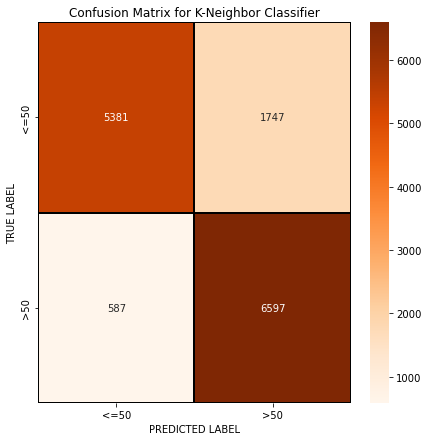

In [68]:
cm = confusion_matrix(y_test, predkn)

x_axis_labels = ["<=50",">50"]
y_axis_labels = ["<=50",">50"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Oranges", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for K-Neighbor Classifier')
plt.show()

# Cross Validation Score:

In [69]:
# cv score for Decision Tree Classifier
print(cross_val_score(DTC,X,y,cv=5).mean())

0.8297088928451867


In [70]:
# cv score for Random Forest Classifier
print(cross_val_score(RFC,X,y,cv=5).mean())

0.8813161923089335


In [71]:
# cv score for Support Vector Classifier
print(cross_val_score(SV,X,y,cv=5).mean())

0.8149290628926629


In [72]:
# cv score for KNN Classifier
print(cross_val_score(knn,X,y,cv=5).mean())

0.8442966164999026


# Hyper Parameter tuning:

In [73]:
#Giving the parameters list for RFC model.
parameter = {'criterion':['gini','entropy'],
             'max_depth': [10,15,20,25],
             'n_estimators':[100,200,300,400],
             'max_features': ["auto","sqrt","log2"]}

In [74]:
GCV=GridSearchCV(RandomForestClassifier(),parameter,cv=5)

In [75]:
# training the model
GCV.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15, 20, 25],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 300, 400]})

In [76]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 25,
 'max_features': 'log2',
 'n_estimators': 300}

In [77]:
Final_mod=RandomForestClassifier(criterion='gini',max_depth=25, max_features='auto', n_estimators=200)
Final_mod.fit(X_train,y_train)
pred=Final_mod.predict(X_test)
acc=accuracy_score(y_test, pred)

print(acc*100)

88.07294577976523


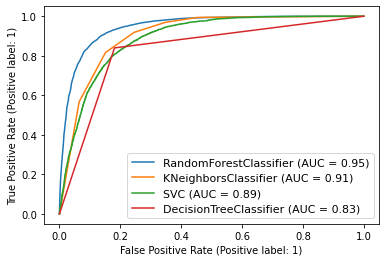

In [78]:
# Plotting for all the models used here
from sklearn import datasets 
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve 
disp = plot_roc_curve(RFC,X_test,y_test)
plot_roc_curve(knn, X_test, y_test, ax=disp.ax_)     # ax_=Axes with confusion matrix
plot_roc_curve(SV, X_test, y_test, ax=disp.ax_)
plot_roc_curve(DTC, X_test, y_test, ax=disp.ax_)

plt.legend(prop={'size':11}, loc='lower right')
plt.show()

# Saving the model:

In [79]:
#Saving the model as .pkl file
import joblib
joblib.dump(Final_mod,"Census_income.pkl")

['Census_income.pkl']

# Predictions:

In [80]:
# Loading the saved model
model=joblib.load("Census_income.pkl")

#Prediction
prediction = model.predict(X_test)
prediction

array([0, 0, 1, ..., 0, 0, 1])

In [81]:
pd.DataFrame([model.predict(X_test)[:],y_test[:]],index=["Predicted","Actual"])

,0,1,2,3,4,5,6,7,8,9,...,14302,14303,14304,14305,14306,14307,14308,14309,14310,14311
Predicted,0,0,1,1,1,0,0,0,1,0,...,1,0,0,1,1,0,1,0,0,1
Actual,0,0,1,1,0,0,0,0,1,0,...,1,0,0,1,1,0,1,0,0,1
